In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
true_mobility = pd.read_csv('train.csv')

In [3]:
# POI analysis
poi_data = pd.read_csv('cell_POIcat.csv.gz', compression='gzip')

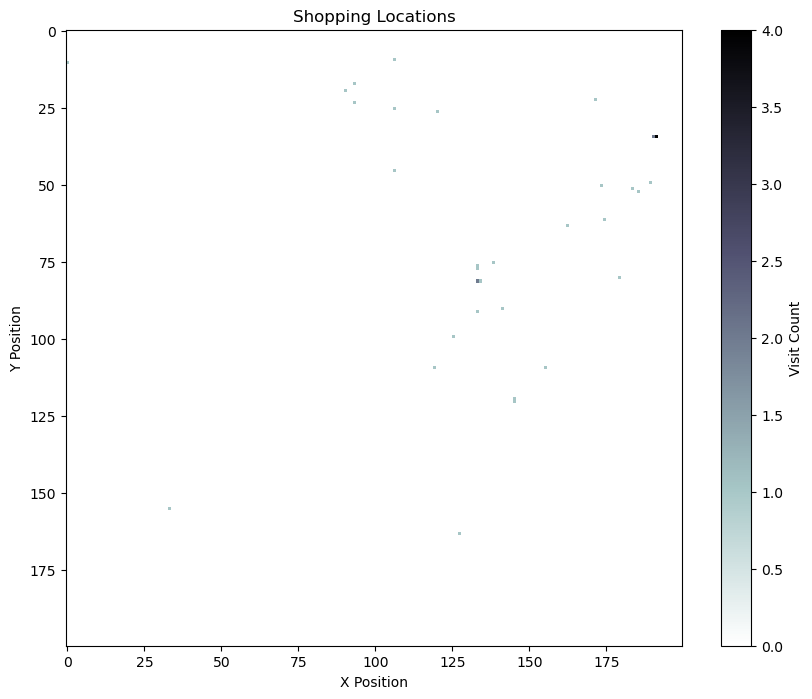

In [4]:
# Filter shopping POI data
poi_data_shopping = poi_data[poi_data['POIcategory'] == 2][['x', 'y', 'POI_count']]

# Initiation
grid = np.zeros((200, 200))

# Populate the grid with visit counts
for _, row in poi_data_shopping.iterrows():
    grid[row['y'] - 1, row['x'] - 1] = row['POI_count']

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(grid, cmap='bone_r', interpolation='nearest')
plt.colorbar(label='Visit Count')

# Adding labels and legends
plt.title('Shopping Locations')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.show()

In [5]:
# Calculate value counts and reset the index
value_counts = true_mobility['combined_xy'].value_counts().reset_index()
value_counts.columns = ['combined_xy', 'Visit Count']

def decode_token_to_cell(token_id, num_cells_per_row):
    cell_x = token_id % num_cells_per_row + 1
    cell_y = token_id // num_cells_per_row + 1 
    return cell_x, cell_y

# Decode each combined_xy token to (x, y)
value_counts['Location'] = value_counts['combined_xy'].apply(lambda x: decode_token_to_cell(x, 200))

value_counts[['Location', 'Visit Count']]

,Location,Visit Count
0,"(135, 77)",298796
1,"(135, 82)",164011
2,"(134, 77)",147920
3,"(129, 81)",126383
4,"(135, 78)",116224
...,...,...
33504,"(60, 154)",1
33505,"(66, 29)",1
33506,"(172, 193)",1
33507,"(172, 194)",1


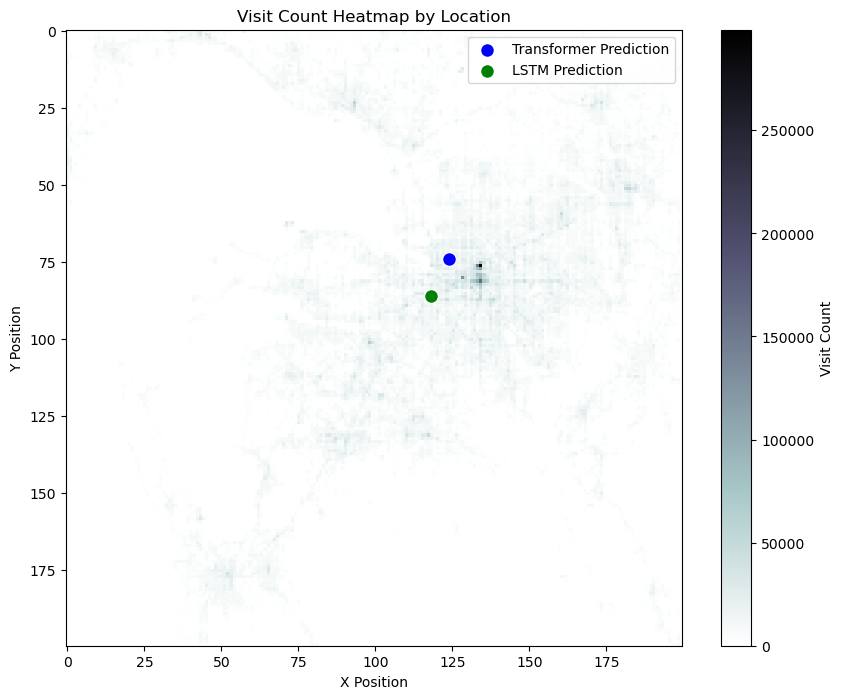

In [8]:
value_counts['coordinates'] = value_counts['combined_xy'].apply(lambda x: decode_token_to_cell(x, 200))
value_counts[['cell_x', 'cell_y']] = pd.DataFrame(value_counts['coordinates'].tolist(), index=value_counts.index)

# Initiation
grid = np.zeros((200, 200))

# Populate the grid with visit counts
for _, row in value_counts.iterrows():
    grid[row['cell_y'] - 1, row['cell_x'] - 1] = row['Visit Count'] 

# Frequently visited location predicted by two models
transformer_location = (125, 75)
lstm_location = (119,87)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(grid, cmap='bone_r', interpolation='nearest') 
plt.colorbar(label='Visit Count')

# Plot the predictions
# Note: Adjust coordinates by -1 for zero-indexing
plt.scatter(transformer_location[0]-1, transformer_location[1]-1, color='blue', s=100, label='Transformer Prediction', edgecolors='w')
plt.scatter(lstm_location[0]-1, lstm_location[1]-1, color='green', s=100, label='LSTM Prediction', edgecolors='w')

# Adding labels and legends
plt.title('Visit Count Heatmap by Location')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend() 

plt.show()

In [9]:
true_mobility = pd.read_csv('train.csv')
true_mobility = true_mobility[true_mobility['uid']==5]

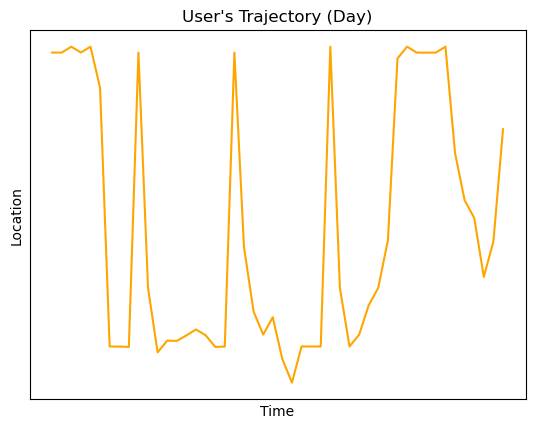

In [10]:
true_mobility_temp = true_mobility.head(101)
true_mobility_temp = true_mobility_temp[(true_mobility_temp['t']>=12) & (true_mobility_temp['t']<34)]

plt.figure()

plt.plot(true_mobility_temp['combined_xy'].to_numpy(), color='orange')

# Hide x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Give titles
plt.xlabel('Time')
plt.ylabel('Location')
plt.title("User's Trajectory (Day)")

plt.show()

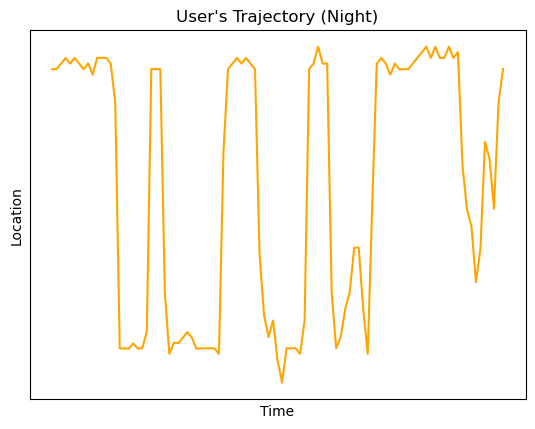

In [11]:
true_mobility_temp = true_mobility.head(101)
true_mobility_temp[ (true_mobility_temp['t']<12) & (true_mobility_temp['t']>=34)]

plt.figure()

plt.plot(true_mobility_temp['combined_xy'].to_numpy(), color='orange')

# Hide x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Give titles
plt.xlabel('Time')
plt.ylabel('Location')
plt.title("User's Trajectory (Night)")

plt.show()

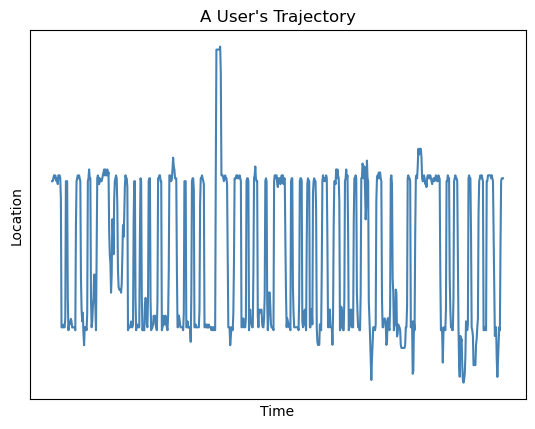

In [12]:
plt.figure()

plt.plot(true_mobility['combined_xy'].to_numpy(), color='steelblue')

# Hide x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Give titles
plt.xlabel('Time')
plt.ylabel('Location')
plt.title("A User's Trajectory")

plt.show()

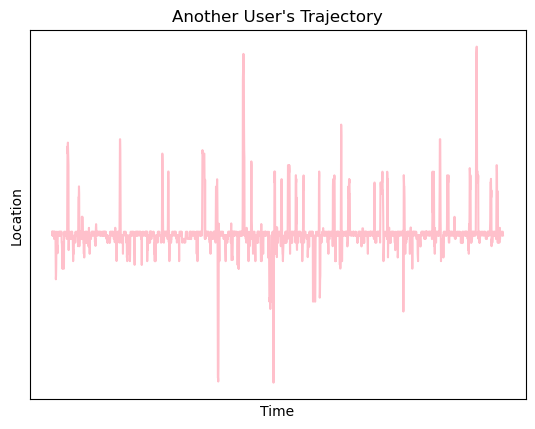

In [ ]:
true_mobility = pd.read_csv('train.csv')
true_mobility_temp = true_mobility[true_mobility['uid']==1]

plt.figure()

plt.plot(true_mobility_temp['combined_xy'].to_numpy(), color='pink')

# Hide x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Give titles
plt.xlabel('Time')
plt.ylabel('Location')
plt.title("Another User's Trajectory")

plt.show()

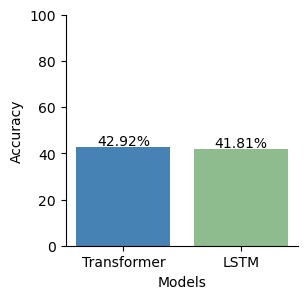

In [ ]:
import matplotlib.pyplot as plt

labels = ['Transformer', 'LSTM']
accuracy = [42.92, 41.81]
colors = ['steelblue', 'darkseagreen']

plt.figure(figsize=(3, 3))
plt.bar(labels, accuracy, color=colors)

plt.xlabel('Models')
plt.ylim(0, 100)
plt.ylabel('Accuracy')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.8, f'{accuracy[i]}%', ha='center')

ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

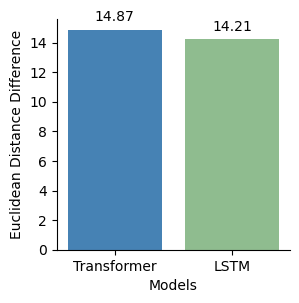

In [ ]:
labels = ['Transformer', 'LSTM']
accuracy = [14.87, 14.21]
colors = ['steelblue', 'darkseagreen']

plt.figure(figsize=(3, 3))
plt.bar(labels, accuracy, color=colors)

plt.xlabel('Models')
plt.ylabel('Euclidean Distance Difference')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.6, f'{accuracy[i]}', ha='center')

ax = plt.gca()  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [15]:
transformer_prediction = pd.read_csv('outputs/test_and_train/transformer_prediction.csv')
lstm_prediction = pd.read_csv('outputs/test_and_train/lstm_prediction.csv')
ground_truth = pd.read_csv('true_test.csv')

In [ ]:
freq_pred_trans = transformer_prediction.value_counts(['x','y']).reset_index()
freq_pred_trans['Location'] = list(zip(freq_pred_trans['x'], freq_pred_trans['y']))
freq_pred_trans.columns = ['x', 'y', 'Visit Count', 'Location']
freq_pred_trans[['Location', 'Visit Count']]

,Location,Visit Count
0,"(135, 77)",15238
1,"(135, 82)",8066
2,"(134, 77)",7056
3,"(129, 81)",6524
4,"(135, 78)",6340
...,...,...
19220,"(124, 28)",1
19221,"(65, 4)",1
19222,"(144, 182)",1
19223,"(66, 76)",1


In [ ]:
freq_pred_lstm = lstm_prediction.value_counts(['x', 'y']).reset_index()
freq_pred_lstm['Location'] = list(zip(freq_pred_lstm['x'], freq_pred_lstm['y']))
freq_pred_lstm.columns = ['x', 'y', 'Visit Count', 'Location']
freq_pred_lstm[['Location', 'Visit Count']]


,Location,Visit Count
0,"(135, 77)",28843
1,"(135, 81)",11332
2,"(135, 78)",10585
3,"(135, 76)",10260
4,"(129, 81)",9923
...,...,...
10920,"(191, 98)",1
10921,"(78, 80)",1
10922,"(149, 42)",1
10923,"(120, 77)",1


In [16]:
ground_truth = ground_truth[ground_truth['uid']==80000]
transformer_prediction = transformer_prediction[transformer_prediction['uid']==80000].head(len(ground_truth))
lstm_prediction = lstm_prediction[lstm_prediction['uid']==80000].head(len(ground_truth))

In [17]:
transformer_pred = pd.merge(ground_truth, transformer_prediction, left_index=True, right_index=True, suffixes=('_true', '_pred'))[['uid_true', 't_true', 'x_true', 'y_true', 'x_pred', 'y_pred']]
transformer_pred.columns = ['uid', 't', 'x_true', 'y_true', 'x_pred', 'y_pred']
transformer_pred

,uid,t,x_true,y_true,x_pred,y_pred
0,80000,17,158,66,85,114
1,80000,18,173,57,132,70
2,80000,19,177,61,130,67
3,80000,20,182,62,129,69
4,80000,21,186,63,127,69
5,80000,22,179,57,129,73
6,80000,24,174,50,129,73
7,80000,25,171,51,129,72
8,80000,28,176,48,70,106
9,80000,31,176,51,141,81


In [26]:
# true_mobility = pd.read_csv('train.csv')
# previous_mob_uid_80000 = true_mobility[true_mobility['uid']==80000]
# previous_mob_uid_80000['combined_xy'].apply(lambda x: decode_token_to_cell(x, 200))

prev_x_vals = [coord[0] for coord in previous_mob_uid_80000.tail(48).values]
prev_y_vals = [coord[1] for coord in previous_mob_uid_80000.tail(48).values]

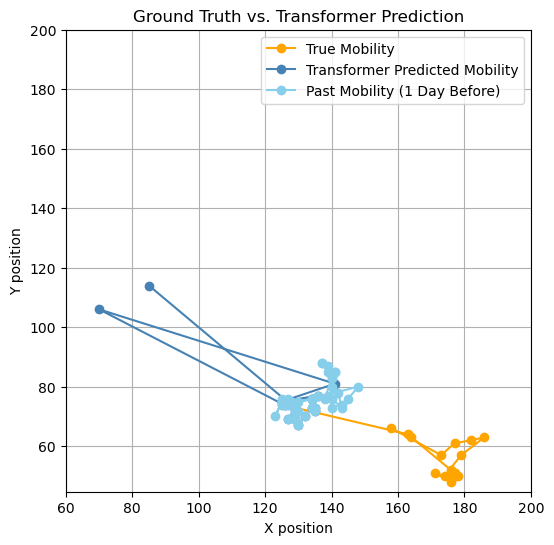

In [44]:
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(transformer_pred['x_true'], transformer_pred['y_true'], label='True Mobility', marker='o', color='orange')  # Ground truth line
plt.plot(transformer_pred['x_pred'], transformer_pred['y_pred'], label='Transformer Predicted Mobility', marker='o', color='steelblue')  # Predicted line

plt.plot(prev_x_vals, prev_y_vals, label='Past Mobility (1 Day Before)', marker='o', color='skyblue')  # Previous Mobility

# Adding titles and labels
plt.title('Ground Truth vs. Transformer Prediction')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.xticks([60, 80, 100, 120, 140, 160, 180, 200])
plt.yticks([60, 80, 100, 120, 140, 160, 180, 200])
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [29]:
lstm_pred = pd.merge(ground_truth, lstm_prediction, left_index=True, right_index=True, suffixes=('_true', '_pred'))[['uid_true', 't_true', 'x_true', 'y_true', 'x_pred', 'y_pred']]
lstm_pred.columns = ['uid', 't', 'x_true', 'y_true', 'x_pred', 'y_pred']
lstm_pred

,uid,t,x_true,y_true,x_pred,y_pred
0,80000,17,158,66,87,133
1,80000,18,173,57,119,87
2,80000,19,177,61,119,87
3,80000,20,182,62,119,87
4,80000,21,186,63,119,87
5,80000,22,179,57,119,87
6,80000,24,174,50,119,87
7,80000,25,171,51,119,87
8,80000,28,176,48,87,133
9,80000,31,176,51,87,133


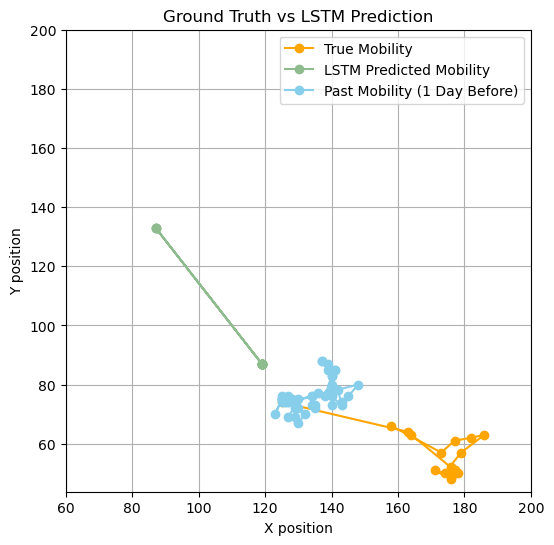

In [41]:
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(lstm_pred['x_true'], lstm_pred['y_true'], label='True Mobility', marker='o', color='orange')  # Ground truth line
plt.plot(lstm_pred['x_pred'], lstm_pred['y_pred'], label='LSTM Predicted Mobility', marker='o', color='darkseagreen')  # Predicted line

plt.plot(prev_x_vals, prev_y_vals, label='Past Mobility (1 Day Before)', marker='o', color='skyblue')  # Previous Mobility

# Adding titles and labels
plt.title('Ground Truth vs LSTM Prediction')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.xticks([60, 80, 100, 120, 140, 160, 180, 200])
plt.yticks([60, 80, 100, 120, 140, 160, 180, 200])
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

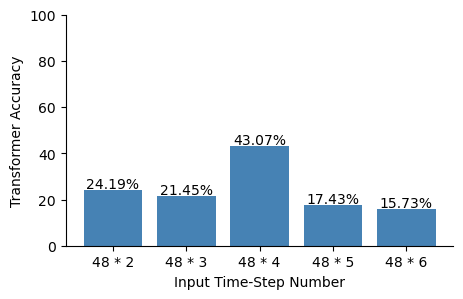

In [ ]:
labels = ['48 * 2', '48 * 3', '48 * 4', '48 * 5', '48 * 6']
accuracy = [24.19, 21.45, 43.07, 17.43, 15.73]

plt.figure(figsize=(5, 3))
plt.bar(labels, accuracy, color='steelblue')

plt.xlabel('Input Time-Step Number')
plt.ylim(0, 100)
plt.ylabel('Transformer Accuracy')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.8, f'{accuracy[i]}%', ha='center')

ax = plt.gca()  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

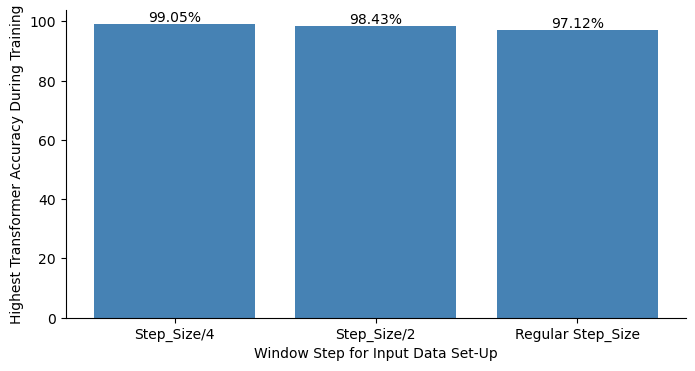

In [48]:
labels = ['Step_Size/4', 'Step_Size/2', 'Regular Step_Size']
accuracy = [99.05, 98.43, 97.12]

plt.figure(figsize=(8, 4))
plt.bar(labels, accuracy, color='steelblue')
plt.xlabel('Window Step for Input Data Set-Up')
plt.ylabel('Highest Transformer Accuracy During Training')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.8, f'{accuracy[i]}%', ha='center')

ax = plt.gca()  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

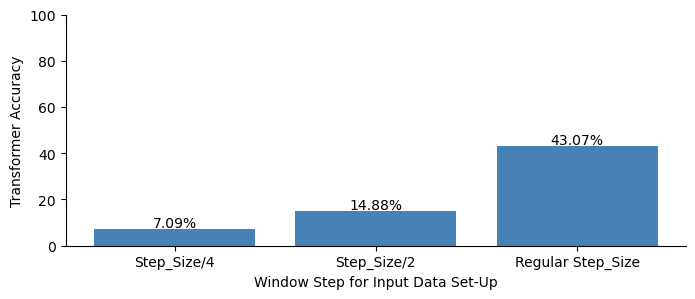

In [49]:
labels = ['Step_Size/4', 'Step_Size/2', 'Regular Step_Size']
accuracy = [7.09, 14.88, 43.07]

plt.figure(figsize=(8, 3))
plt.bar(labels, accuracy, color='steelblue')

plt.ylim(0, 100)
plt.xlabel('Window Step for Input Data Set-Up')
plt.ylabel('Transformer Accuracy')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.9, f'{accuracy[i]}%', ha='center')

ax = plt.gca()  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

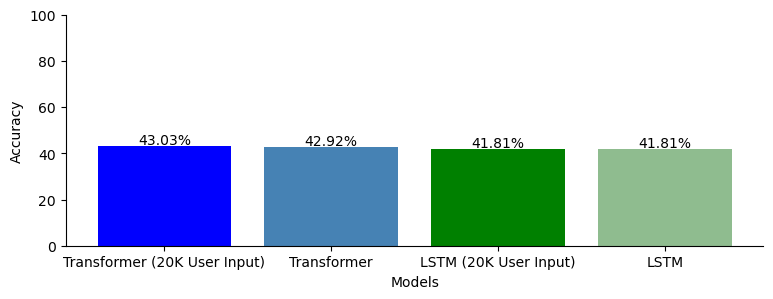

In [ ]:
import matplotlib.pyplot as plt

labels = ['Transformer (20K User Input)', 'Transformer', 'LSTM (20K User Input)', 'LSTM']
accuracy = [43.03, 42.92, 41.81, 41.81]
colors = ['blue', 'steelblue', 'green', 'darkseagreen']

plt.figure(figsize= (9, 3))
plt.bar(labels, accuracy, color=colors)

plt.xlabel('Models')
plt.ylim(0, 100)
plt.ylabel('Accuracy')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.8, f'{accuracy[i]}%', ha='center')

ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

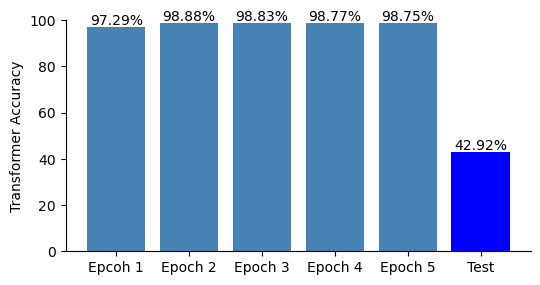

In [ ]:
labels = ['Epcoh 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5', 'Test']
accuracy = [97.29, 98.88, 98.83, 98.77, 98.75, 42.92]

plt.figure(figsize=(6, 3))
plt.bar(labels, accuracy, color=['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'blue'])

plt.ylim(0, 100)
plt.ylabel('Transformer Accuracy')

for i in range(len(accuracy)):
    plt.text(i, accuracy[i] + 0.9, f'{accuracy[i]}%', ha='center')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()